#### 시계열데이터 
- type
    - 년도 표시(4자리수) : %Y
    - 년도 표시(2자리수) : %y
    - 월을 숫자로 표시 : %m
    - 월의 이름을 표시 : %B
    - 월의 이름을 축약해서 표시 : %b
    - 일을 숫자로 표시 : %d
    - 시를 24시 기준으로 표시 : %H
    - 시를 12시 기준으로 표시 : %I
    - AM/PM을 표시 : %p
    - 분을 숫자로 표시 : %M
    - 초를 숫자로 표시 : %S
    - 요일을 이름으로 표시 : %A
    - 요일을 숫자로 표시 : %w ( 0 : 일, ... , 6 : 토 )

In [3]:
from datetime import datetime

In [4]:
time_text = "2025-03-07"

In [5]:
type(time_text)

str

In [6]:
# 문자열 데이터를 시계열 데이터로 변경
time_data = datetime.strptime(time_text, '%Y-%m-%d')
print(time_data)
print(time_text)

2025-03-07 00:00:00
2025-03-07


In [7]:
print(type(time_data))

<class 'datetime.datetime'>


In [8]:
# 시계열 데이터를 문자열 데이터로 변경
time_data.strftime('%y/%m/%d')

'25/03/07'

In [9]:
time_data.strftime('%m월')

'03월'

In [10]:
time_data.strftime('%w')

'5'

In [11]:
time_data.strftime('%a')

'Fri'

In [12]:
import pandas as pd

In [13]:
# pandas에서 제공하는 시계열 데이터 
pd.Timestamp(100000)    # 나노초 단위로 시간을 구한다. 

Timestamp('1970-01-01 00:00:00.000100')

In [14]:
pd.Timestamp(100, unit='D')

Timestamp('1970-04-11 00:00:00')

In [15]:
pd.Timestamp('98-03-07')

Timestamp('1998-03-07 00:00:00')

In [16]:
pd.Timestamp("2016-01")

Timestamp('2016-01-01 00:00:00')

In [17]:
time_data2 = pd.to_datetime('2025년 03월 07일', format="%Y년 %m월 %d일")

In [18]:
time_data3 = pd.Timestamp(1, unit='D')

In [19]:
time_data2 - time_data3

Timedelta('20153 days 00:00:00')

In [20]:
pd.Timedelta("3 days")

Timedelta('3 days 00:00:00')

In [21]:
time_data2 - pd.Timedelta('3 days')

Timestamp('2025-03-04 00:00:00')

In [22]:
time_data2 - pd.Timedelta(days= 30)

Timestamp('2025-02-05 00:00:00')

In [23]:
corona = pd.read_csv("./data/csv/corona.csv")

In [24]:
corona.head()

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [25]:
# 요일별 평균 일일 확진자의 수가 가장 큰 요일은 언제인가?
# 사용할 컬럼들만 추출하여 변수에 저장
df = corona[ ['stateDt', 'decideCnt'] ]

In [26]:
df.head()

,stateDt,decideCnt
0,20220608,18188200
1,20220607,18174842
2,20220606,18168670
3,20220605,18163648
4,20220604,18153814


In [27]:
# 일일확진자 컬럼을 생성 2
df2 = df.copy()
df2.sort_values('stateDt', inplace=True)
df2['일일확진자'] = df2['decideCnt'] - df2['decideCnt'].shift(1).fillna(0)


In [28]:
df2.tail()

,stateDt,decideCnt,일일확진자
4,20220604,18153814,12039.0
3,20220605,18163648,9834.0
2,20220606,18168670,5022.0
1,20220607,18174842,6172.0
0,20220608,18188200,13358.0


In [29]:
# 일일확진자 컬럼을 생성
df3 = df.copy()
df3['일일확진자'] = df3['decideCnt'] - df3['decideCnt'].shift(-1).fillna(0)

In [30]:
df3.head()

,stateDt,decideCnt,일일확진자
0,20220608,18188200,13358.0
1,20220607,18174842,6172.0
2,20220606,18168670,5022.0
3,20220605,18163648,9834.0
4,20220604,18153814,12039.0


In [31]:
# 일일확진자 컬럼을 생성
df4 = df.copy()
df4['일일확진자'] = df4['decideCnt'].diff(-1).fillna(0)

In [32]:
df4.head()

,stateDt,decideCnt,일일확진자
0,20220608,18188200,13358.0
1,20220607,18174842,6172.0
2,20220606,18168670,5022.0
3,20220605,18163648,9834.0
4,20220604,18153814,12039.0


In [33]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   stateDt    820 non-null    int64  
 1   decideCnt  820 non-null    int64  
 2   일일확진자      820 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 19.3 KB


In [ ]:
# int64 -> 시계열데이터
df4['stateDt'] = (pd.to_datetime(df4['stateDt'], format="%Y%m%d"))

In [82]:
df4.head()

,stateDt,decideCnt,일일확진자,요일
0,2022-06-08,18188200,13358.0,3
1,2022-06-07,18174842,6172.0,2
2,2022-06-06,18168670,5022.0,1
3,2022-06-05,18163648,9834.0,0
4,2022-06-04,18153814,12039.0,6


In [ ]:
dayofweek = []
for i in range(len(df4['stateDt'])):
    dayofweek.append(datetime.strftime(df4.loc[i, 'stateDt'], '%w'))

In [87]:
# map으로 바꾸기
df4['요일'] = df4['stateDt'].map(lambda x: x.strftime('%w'))
df4

,stateDt,decideCnt,일일확진자,요일
0,2022-06-08,18188200,13358.0,3
1,2022-06-07,18174842,6172.0,2
2,2022-06-06,18168670,5022.0,1
3,2022-06-05,18163648,9834.0,0
4,2022-06-04,18153814,12039.0,6
...,...,...,...,...
815,2020-03-14,8086,107.0,6
816,2020-03-13,7979,110.0,5
817,2020-03-12,7869,114.0,4
818,2020-03-11,7755,242.0,3


In [97]:
week = ['일','월','화','수','목','금','토']
result = []
for i in range(len(df4['요일'])):
    result.append(week[int(df4.loc[i, '요일'])])

df4['요일(한글)'] = result

In [100]:
# while, dictionary 쓰기
week = {
    '0':'일',
    '1':'월',
    '2':'화',
    '3':'수',
    '4':'목',
    '5':'금',
    '6':'토'
}
result2 = []
i = 0
length = len(df4['요일'])
while i < length:
    result2.append(week[df4.loc[i, '요일']])
    i+=1
result2

['수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금',
 '목',
 '수',
 '화',
 '월',
 '일',
 '토',
 '금'

In [98]:
df4

,stateDt,decideCnt,일일확진자,요일,요일(한글)
0,2022-06-08,18188200,13358.0,3,수
1,2022-06-07,18174842,6172.0,2,화
2,2022-06-06,18168670,5022.0,1,월
3,2022-06-05,18163648,9834.0,0,일
4,2022-06-04,18153814,12039.0,6,토
...,...,...,...,...,...
815,2020-03-14,8086,107.0,6,토
816,2020-03-13,7979,110.0,5,금
817,2020-03-12,7869,114.0,4,목
818,2020-03-11,7755,242.0,3,수


In [76]:
# map으로 바꾸기
week = ['일','월','화','수','목','금','토']
df4['요일'] = df4['요일'].map(lambda x: week[int(x)])
# df4['요일'].map(lambda x: week[int(x)])

0      수
1      화
2      월
3      일
4      토
      ..
815    토
816    금
817    목
818    수
819    화
Name: 요일, Length: 820, dtype: object

In [77]:
df4.head()

,stateDt,decideCnt,일일확진자,요일
0,2022-06-08,18188200,13358.0,3
1,2022-06-07,18174842,6172.0,2
2,2022-06-06,18168670,5022.0,1
3,2022-06-05,18163648,9834.0,0
4,2022-06-04,18153814,12039.0,6


In [128]:
df5 = df4.drop(819,axis=0).copy()

In [130]:
df5 = df5.groupby(['요일(한글)'])[['일일확진자']].mean().sort_values('일일확진자', ascending=False)

In [131]:
df5.reset_index()

,요일(한글),일일확진자
0,수,26994.550847
1,목,25776.267241
2,토,22555.948718
3,금,22542.854701
4,화,21969.837607
5,일,20801.384615
6,월,14739.230769


In [132]:
# 시각화
import matplotlib.pyplot as plt

<Axes: xlabel='요일(한글)'>

C:\Users\SAMSUNG\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\SAMSUNG\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  func(*args, **kwargs)
C:\Users\SAMSUNG\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  func(*args, **kwargs)
C:\Users\SAMSUNG\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\SAMSUNG\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\SAMSUNG\AppData\Roaming\Pyt

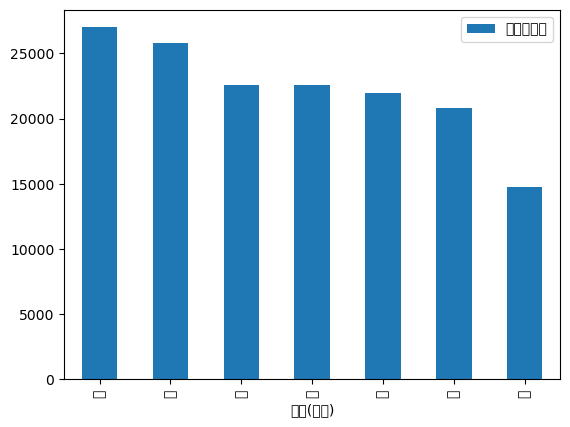

In [133]:
df5.plot(kind='bar')

In [134]:
# font 설정
import platform

In [138]:
if platform.system() == "Darwin":
    plt.rc('font', family = "AppleGothic")
else:
    plt.rc('font', family = "Malgun Gothic")

<Axes: xlabel='요일(한글)'>

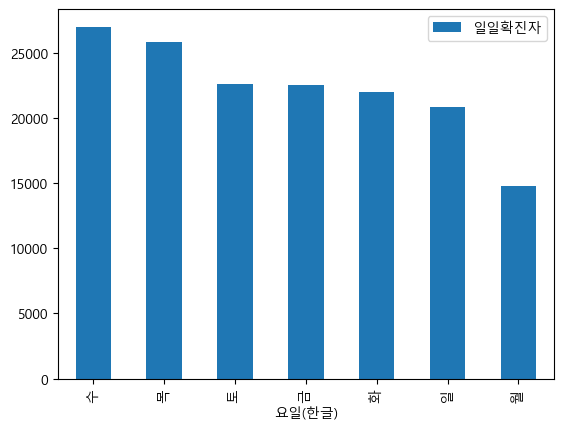

In [142]:
df5.plot(kind='bar')